# Preparation
### by: M. Alwi Sukra

import library yang dibutuhkan

In [1]:
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

### 1. Get Data

ambil data dari CSV

In [2]:
csv_path = 'D:/datasets/UTA-RLDD/csv/60.csv'
df_feature = pd.read_csv(csv_path, delimiter=';', names=['subject','class','frame','rEar','lEar','mar'])

melihat data sekilas

In [3]:
df_feature.head()

,subject,class,frame,rEar,lEar,mar
0,60,0,1,0.291313,0.285976,0.020835
1,60,0,2,0.293103,0.285886,0.043124
2,60,0,3,0.310350,0.313614,0.029487
3,60,0,4,0.292881,0.279358,0.042981
4,60,0,5,0.334183,0.353239,0.056338


In [6]:
type(df_feature['rEar'])

pandas.core.series.Series

In [14]:
not df_feature['rEar']

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [31]:
df_feature.describe()

,subject,class,frame,rEar,lEar,mar
count,54168.0,54168.000000,54168.000000,54131.000000,54131.000000,54131.000000
mean,60.0,5.048645,9033.569026,0.278292,0.283387,0.062174
std,0.0,4.111690,5221.137355,0.053788,0.047863,0.079491
min,60.0,0.000000,1.000000,0.105989,0.113089,0.000000
25%,60.0,0.000000,4514.750000,0.244438,0.250623,0.022346
50%,60.0,5.000000,9028.500000,0.269386,0.278332,0.034618
75%,60.0,10.000000,13542.250000,0.301999,0.309630,0.061165
max,60.0,10.000000,18581.000000,0.647858,0.674259,0.819896


In [32]:
df_feature.count()

subject    54168
class      54168
frame      54168
rEar       54131
lEar       54131
mar        54131
dtype: int64

### 2. Clean Data 

Pada data terdapat NaN, sehingga harus dilakukan sesuatu pada NaN tersebut agar analisa lebih baik

In [33]:
groups = df_feature.groupby('class')

**pertama**, cek berapa banyak NaN di setiap kelas

In [34]:
# for each group
for idx_class, df_class in groups:
    # check only in rEar, because total of NaN values for rEar, lEar, and mar is the same.
    nanValuesCount = df_class.isna().sum().rEar
    # calculate ratio
    ratio = nanValuesCount/len(df_class)
    # print value
    print(f'terdapat {nanValuesCount} NaN di data kelass {idx_class} dengan rasio {ratio}')

terdapat 5 NaN di data kelass 0 dengan rasio 0.00027694693696687716
terdapat 2 NaN di data kelass 5 dengan rasio 0.00011407060970740888
terdapat 30 NaN di data kelass 10 dengan rasio 0.001614552499865454


**kedua**, isi NaN dengan data pertama bukan NaN setelahnya

In [35]:
df_feature.fillna(method="bfill", inplace=True)

In [36]:
df_feature.head()

,subject,class,frame,rEar,lEar,mar
0,60,0,1,0.291313,0.285976,0.020835
1,60,0,2,0.293103,0.285886,0.043124
2,60,0,3,0.310350,0.313614,0.029487
3,60,0,4,0.292881,0.279358,0.042981
4,60,0,5,0.334183,0.353239,0.056338


Selain NaN, nilai kelas juga dirubah menjadi 0,1,2 dari 0,5,10 agar lebih mudah untuk diatur dan diproses lebih lanjut

In [37]:
val_dict = dict([(0, 0), (5, 1), (10,2)])
df_feature['class'].replace(val_dict, inplace=True)

In [38]:
df_feature['class'].value_counts()

2    18581
0    18054
1    17533
Name: class, dtype: int64

### 3. Explore Data

**pertama**, siapkan data yang akan di plot

In [39]:
# group by class
groups = df_feature.groupby('class')
# container for data going to be plotted
data = {'rEar':np.empty(3, dtype=object), 'lEar':np.empty(3, dtype=object), 'mar':np.empty(3, dtype=object)}
keys = [*data]
# get data
for idx_class, df_class in groups:
    data['rEar'][idx_class] = df_class['rEar'].values
    data['lEar'][idx_class] = df_class['lEar'].values
    data['mar'][idx_class] = df_class['mar'].values

menggunakan **boxplot** untuk menjelaskan persebaran data di setiap kelas untuk setiap fitur

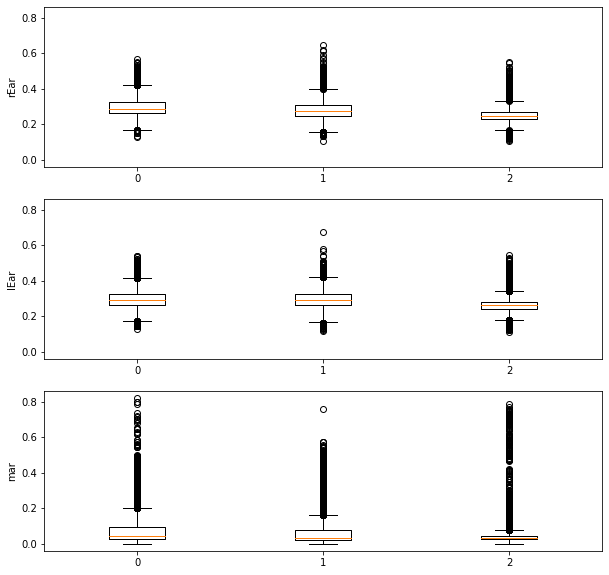

In [40]:
fig, ax = plt.subplots(3, 1, sharey=True, figsize = (10,10))

for i in range(3):
    ax[i].set_xticklabels([0,1,2])
    ax[i].set_ylabel(keys[i])
    ax[i].boxplot(data[keys[i]])

Dari box plot diatas dapat dilihat:
1. Eye Aspect Ratio persebaran nilainya semakin menurun mulai dari kelas 0 s/d 2. untuk kelas 0 lebih banyak data yang ber
2. Mouth Aspect Ratio, dapat dilihat untuk kelas 0, data nilainya lebih sering bernilai kecil, sedangkan untuk kelas 1 dan 2 range nya lebih luas dengan persebaran yang lebih merata.

menggunakan **trend line** untuk mendiskripsikan nilai data terhadap berjalannya waktu (timeframe)

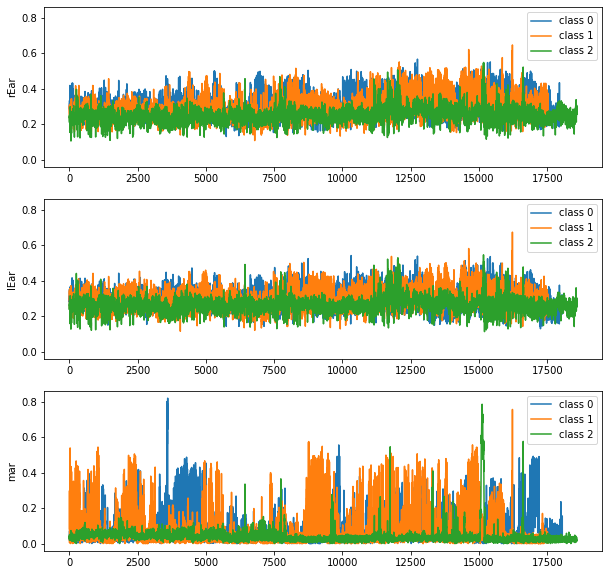

In [41]:
fig, ax = plt.subplots(3, 1, sharey=True, figsize = (10,10))
    
for i in range(3):
    ax[i].set_ylabel(keys[i])
    c0 = ax[i].plot(data[keys[i]][0], label='class 0')
    c1 = ax[i].plot(data[keys[i]][1], label='class 1')
    c2 = ax[i].plot(data[keys[i]][2], label='class 2')
    ax[i].legend()

Dari plot diatas dapat dilihat:
1. untuk Eye Aspect Ratio, kelas 2 cenderung dibawah, kelas 1 ditengah, dan kelas 0 diatas
2. untuk Mouth Aspect Ratio, terlihat kelas 0 dominan di bawah, kelas dan 1 dan 2 mirip

### 4. Transform Data

**transformasi upper outliers** pada kedua Eye Aspect Ratio, karena mungkin upper outliers terjadi karena kekeliuran. Seharusnya saat mata terbuka nilai max lebih stabil. Transformasi yang dilakukan adalah membuat nilai maksimal Eye Aspect Ratio menjadi **Q3+1.5(IQR)**

In [42]:
rEar_q3 = df_feature.describe().rEar['75%']
rEar_iqr = rEar_q3 - df_feature.describe().rEar['25%']
max_rEar = rEar_q3 + (1.5 * rEar_iqr)
lEar_q3 = df_feature.describe().lEar['75%']
lEar_iqr = lEar_q3 - df_feature.describe().lEar['25%']
max_lEar = lEar_q3 + (1.5 * lEar_iqr)
print(f'max rEar = {max_rEar} and max lEar = {max_lEar}')

max rEar = 0.388377 and max lEar = 0.39815312500000005


In [43]:
df_feature.loc[df_feature['rEar'] > max_rEar, 'rEar'] = max_rEar
df_feature.loc[df_feature['lEar'] > max_lEar, 'lEar'] = max_lEar

In [44]:
df_feature.describe()

,subject,class,frame,rEar,lEar,mar
count,54168.0,54168.000000,54168.000000,54168.000000,54168.000000,54168.000000
mean,60.0,1.009729,9033.569026,0.276322,0.282723,0.062153
std,0.0,0.822338,5221.137355,0.048320,0.045927,0.079469
min,60.0,0.000000,1.000000,0.105989,0.113089,0.000000
25%,60.0,0.000000,4514.750000,0.244402,0.250600,0.022350
50%,60.0,1.000000,9028.500000,0.269375,0.278226,0.034608
75%,60.0,2.000000,13542.250000,0.301992,0.309621,0.061157
max,60.0,2.000000,18581.000000,0.388377,0.398153,0.819896


lakukan **min max scaling** sehingga data aspect ratio menjadi memiliki rentang nilai 0 s/d 1, dimana 0 menandakan mata tertutup dan 1 mata terbuka. Hal ini dilakukan karena nilai maksimal dan minimal yang menandakan buka/tutup mata setiap orang berbeda.

In [45]:
scaler = MinMaxScaler(feature_range=(0,1))
df_feature[['rEar','lEar','mar']] = scaler.fit_transform(df_feature[['rEar','lEar','mar']])

melihat hasil transformasi secara sekilas

In [46]:
df_feature.head()

,subject,class,frame,rEar,lEar,mar
0,60,0,1,0.656274,0.606485,0.025412
1,60,0,2,0.662613,0.606169,0.052597
2,60,0,3,0.723689,0.703438,0.035964
3,60,0,4,0.661827,0.583269,0.052423
4,60,0,5,0.808087,0.842442,0.068713


In [47]:
df_feature.describe()

,subject,class,frame,rEar,lEar,mar
count,54168.0,54168.000000,54168.000000,54168.000000,54168.000000,54168.000000
mean,60.0,1.009729,9033.569026,0.603187,0.595075,0.075806
std,0.0,0.822338,5221.137355,0.171114,0.161113,0.096925
min,60.0,0.000000,1.000000,0.000000,0.000000,0.000000
25%,60.0,0.000000,4514.750000,0.490152,0.482386,0.027260
50%,60.0,1.000000,9028.500000,0.578587,0.579298,0.042210
75%,60.0,2.000000,13542.250000,0.694091,0.689432,0.074591
max,60.0,2.000000,18581.000000,1.000000,1.000000,1.000000


In [48]:
# group by class
groups = df_feature.groupby('class')
# container for data going to be plotted
data = {'rEar':np.empty(3, dtype=object), 'lEar':np.empty(3, dtype=object), 'mar':np.empty(3, dtype=object)}
keys = [*data]
# get data
for idx_class, df_class in groups:
    data['rEar'][idx_class] = df_class['rEar'].values
    data['lEar'][idx_class] = df_class['lEar'].values
    data['mar'][idx_class] = df_class['mar'].values

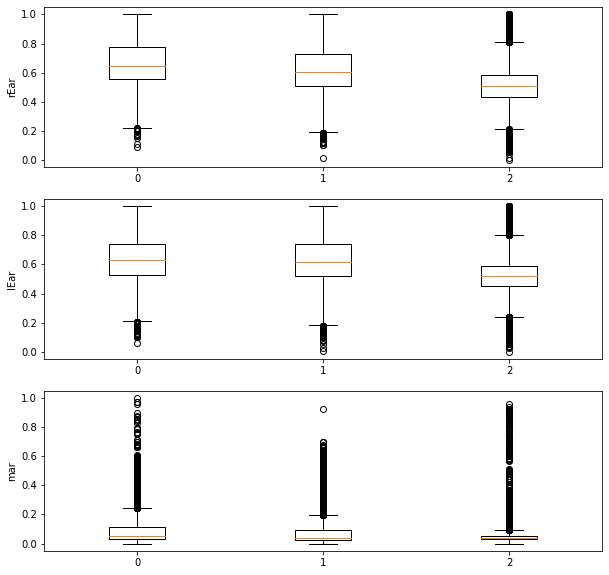

In [49]:
fig, ax = plt.subplots(3, 1, sharey=True, figsize = (10,10))

for i in range(3):
    ax[i].set_xticklabels([0,1,2])
    ax[i].set_ylabel(keys[i])
    ax[i].boxplot(data[keys[i]])

Dapat dilihat namun rentang nya berubah

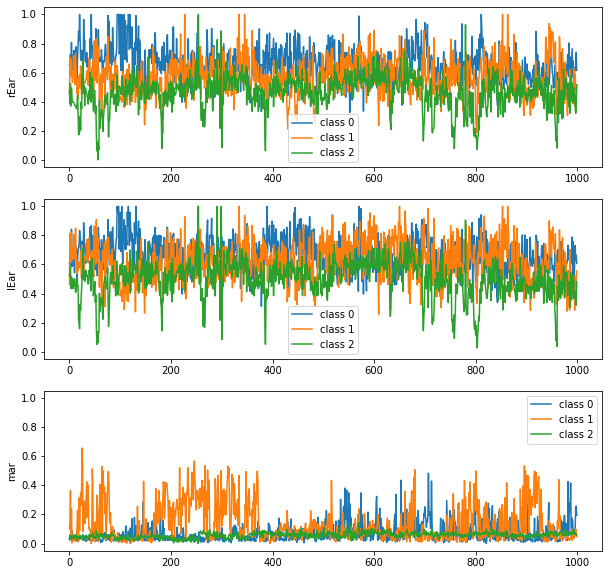

In [50]:
fig, ax = plt.subplots(3, 1, sharey=True, figsize = (10,10))
    
for i in range(3):
    ax[i].set_ylabel(keys[i])
    c0 = ax[i].plot(data[keys[i]][0][0:1000], label='class 0')
    c1 = ax[i].plot(data[keys[i]][1][0:1000], label='class 1')
    c2 = ax[i].plot(data[keys[i]][2][0:1000], label='class 2')
    ax[i].legend()

### 5. Write Output

In [51]:
df_feature.to_pickle("./prep-out.pkl")